<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [ ]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome



In [ ]:
# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

Eigen vectors:  [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]
 [ 0.08069115 -0.40432871  0.05598649  0.03797608 -0.34994376  0.05364595
   0.8336801   0.0712006 ]
 [-0.47560573  0.46632804  0.32795306 -0.48786206 -0.34693481  0.25320376
   0.11981049 -0.10928996]
 [ 0.19359817  0.09416176 -0.6341159   0.00958944 -0.27065061  0.68537218
  -0.08578409 -0.03335717]]
Eigen values:  [2.09711056 1.73346726 1.03097228 0.87667054 0.76333832 0.68351839]
Explained variance per PC:  [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855]


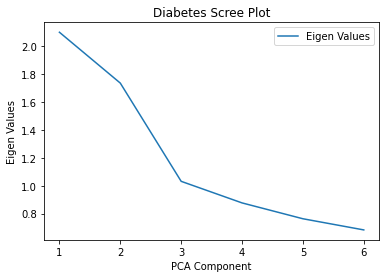

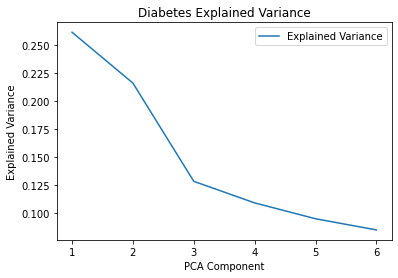

In [ ]:
#Scree plot PCA components
comp = 6

pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(xs)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1)
finalDf.head(10)

print('Eigen vectors: ', pca.components_)
print('Eigen values: ',pca.explained_variance_)
print('Explained variance per PC: ', pca.explained_variance_ratio_)

xPCA=[1, 2, 3, 4, 5, 6]

pyplot.plot(xPCA,pca.explained_variance_, label='Eigen Values')
pyplot.title('Diabetes Scree Plot')
pyplot.ylabel('Eigen Values')
pyplot.xlabel('PCA Component')
pyplot.legend()
pyplot.show()

pyplot.plot(xPCA,pca.explained_variance_ratio_, label='Explained Variance')
pyplot.title('Diabetes Explained Variance')
pyplot.ylabel('Explained Variance')
pyplot.xlabel('PCA Component')
pyplot.legend()
pyplot.show()

Eigen vectors:  [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]]
Eigen values:  [2.09711056 1.73346726]
Explained variance per PC:  [0.26179749 0.21640127]


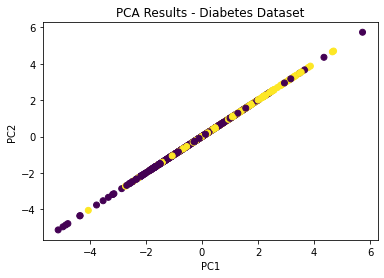

In [ ]:
#Generate PCA components 
comp = 2

pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(xs)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1)
finalDf.head(10)

x2PCA = finalDf.drop(['Outcome'], axis=1)
y2PCA = finalDf['Outcome']

print('Eigen vectors: ', pca.components_)
print('Eigen values: ',pca.explained_variance_)
print('Explained variance per PC: ', pca.explained_variance_ratio_)

if comp==2:
   pyplot.scatter(finalDf['principal component 1'], finalDf['principal component 1'], c=finalDf['Outcome'])
   pyplot.title('PCA Results - Diabetes Dataset')
   pyplot.ylabel('PC2')
   pyplot.xlabel('PC1')


tp:  0.19140625
fp:  0.16796875
fn:  0.15755208333333334
tn:  0.4830729166666667
err:  0.32552083333333337
time:  0.04207838500042271
0.3255208333333333
0.3255208333333333
-0.010416666666666666
0.5704492320872112


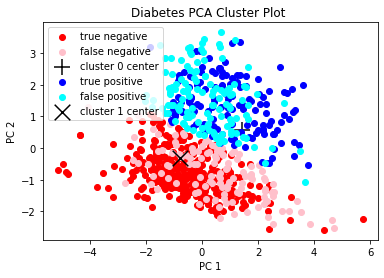

In [ ]:
# 2 component KMeans

kmeans = KMeans(n_clusters=2, random_state=1) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x2PCA)
toc = time.perf_counter()
labels = abs(labels - 1) #map cluster number to labels 

tn, fp, fn, tp = confusion_matrix(y2PCA, labels).ravel()/y2PCA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y2PCA, labels))
print(mean_absolute_error(y2PCA, labels))
print(np.mean(y2PCA-labels))
print(np.std(y2PCA-labels))

#
clx=finalDf
clx['Cluster']=labels
cl_centers=kmeans.cluster_centers_

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

pyplot.scatter(cl0tn['principal component 1'], cl0tn['principal component 2'], color='red', label='true negative')
pyplot.scatter(cl0fn['principal component 1'], cl0fn['principal component 2'], color='pink', label='false negative')
pyplot.scatter(cl_centers[0][1], cl_centers[0][0], color='black', marker='+', s=288, label='cluster 0 center')

pyplot.scatter(cl1tp['principal component 1'], cl1tp['principal component 2'], color='blue', label='true positive')
pyplot.scatter(cl1fp['principal component 1'], cl1fp['principal component 2'], color='cyan', label='false positive')
pyplot.scatter(cl_centers[1][1], cl_centers[1][0], color='black', marker='x', s=244, label='cluster 1 center')

pyplot.title('Diabetes PCA Cluster Plot ')
pyplot.ylabel('PC 2')
pyplot.xlabel('PC 1')
pyplot.legend()

In [ ]:
# 2 component EM
gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='spherical', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x2PCA)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct cluster-label scheme
    
acc = accuracy_score(y2PCA, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y2PCA, labels).ravel()/y2PCA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y2PCA, labels))
print(mean_absolute_error(y2PCA, labels))
print(np.mean(y2PCA-labels))
print(np.std(y2PCA-labels))

Accuracy using GMM =  0.6302083333333334
tp:  0.2994791666666667
fp:  0.3203125
fn:  0.049479166666666664
tn:  0.3307291666666667
err:  0.3697916666666667
time:  0.024361267000131193
0.3697916666666667
0.3697916666666667
-0.2708333333333333
0.5444639310571658


In [ ]:
#Generate PCA components 
comp = 3

pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(xs)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1)
finalDf.head(10)

x3PCA = finalDf.drop(['Outcome'], axis=1)
y3PCA = finalDf['Outcome']

print('Eigen vectors: ', pca.components_)
print('Eigen values: ',pca.explained_variance_)
print('Explained variance per PC: ', pca.explained_variance_ratio_)

Eigen vectors:  [[ 0.1284321   0.39308257  0.36000261  0.43982428  0.43502617  0.45194134
   0.27061144  0.19802707]
 [ 0.59378583  0.17402908  0.18389207 -0.33196534 -0.25078106 -0.1009598
  -0.122069    0.62058853]
 [-0.01308692  0.46792282 -0.53549442 -0.2376738   0.33670893 -0.36186463
   0.43318905  0.07524755]]
Eigen values:  [2.09711056 1.73346726 1.03097228]
Explained variance per PC:  [0.26179749 0.21640127 0.12870373]


In [ ]:
# 3 component KMeans
kmeans = KMeans(n_clusters=2, random_state=1) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x3PCA)
toc = time.perf_counter()
labels = abs(labels - 1) #map cluster number to labels 

tn, fp, fn, tp = confusion_matrix(y3PCA, labels).ravel()/y3PCA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y3PCA, labels))
print(mean_absolute_error(y3PCA, labels))
print(np.mean(y3PCA-labels))
print(np.std(y3PCA-labels))


tp:  0.19140625
fp:  0.16796875
fn:  0.15755208333333334
tn:  0.4830729166666667
err:  0.32552083333333337
time:  0.061857796001277165
0.3255208333333333
0.3255208333333333
-0.010416666666666666
0.5704492320872112


In [ ]:
# 3 component EM
gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='spherical', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x3PCA)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct cluster-label scheme
    
acc = accuracy_score(y3PCA, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y3PCA, labels).ravel()/y3PCA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y3PCA, labels))
print(mean_absolute_error(y3PCA, labels))
print(np.mean(y3PCA-labels))
print(np.std(y3PCA-labels))

Accuracy using GMM =  0.6536458333333334
tp:  0.2903645833333333
fp:  0.2877604166666667
fn:  0.05859375
tn:  0.36328125
err:  0.3463541666666667
time:  0.025994374000219977
0.3463541666666667
0.3463541666666667
-0.22916666666666666
0.542067159635737
